In [1]:
# Simulate tropospheric turbulence delay time-series based on the fractal/power-law surface 
# Reference: Hanssen, 2001, Chap. 4.7

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from pysar.utils import readfile, writefile, utils as ut
from pysar.simulation import fractal


work_dir = '/Users/yunjunz/development/python/2018_ComputGeosci_PySAR/phaseCorrection_order'
os.chdir(work_dir)
print('Go to directory: '+work_dir)

out_file = 'turbulence.h5'

ref_file = '/Users/yunjunz/insarlab/PYSAR_EXAMPLE/AlcedoSenDT128/PYSAR/timeseriesResidual_quadratic.h5'
atr = readfile.read_attribute(ref_file)
length, width = int(atr['LENGTH']), int(atr['WIDTH'])
step = abs(ut.range_ground_resolution(atr))

Go to directory: /Users/yunjunz/development/python/2018_ComputGeosci_PySAR/phaseCorrection_order


In [2]:
# calculate power from PYSAR deramped timeseries phase residual, and use it as input to simulate turbulence

ref_data = readfile.read(ref_file)[0]
num_date = ref_data.shape[0]

print('simulating tropospheric turbulence ...')
trop_data = np.zeros(ref_data.shape, np.float32)
for i in range(num_date):
    sys.stdout.write('\r{}/{}'.format(i+1, num_date))
    sys.stdout.flush()
    p0 = fractal.check_power_spectrum_1d(ref_data[i, :, :], resolution=step, display=False)[0]
    trop = fractal.fractal_surface_atmos(shape=(length, width), resolution=step, p0=p0)
    trop_data[i, :, :] = trop
writefile.write(trop_data, out_file=out_file, ref_file=ref_file)

reading timeseries data from file: /Users/yunjunz/insarlab/PYSAR_EXAMPLE/AlcedoSenDT128/PYSAR/timeseriesResidual_quadratic.h5 ...
simulating tropospheric turbulence ...
83/83create timeseries HDF5 file: turbulence.h5 with w mode
create dataset /timeseries of float32    in size of (83, 646, 729)
create dataset /dates      of |S8        in size of (83,)
create dataset /bperp      of float32    in size of (83,)
finished writing to turbulence.h5


C0 = 0.006045, beta = 2.368, Fractal dim = 2.8


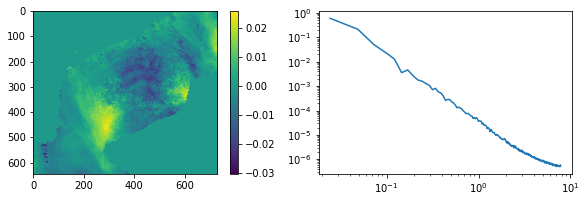

C0 = 0.005811, beta = 2.602, Fractal dim = 2.7


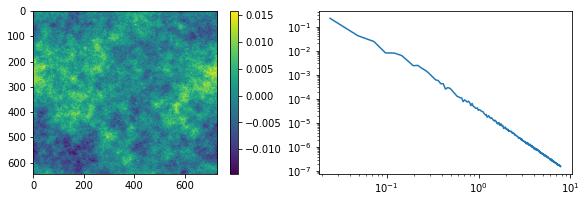

(0.0058109964456002231, 2.6017272703887744, 2.6991363648056126)

In [8]:
# example of simulation for one epoch of timeseries

p0 = fractal.check_power_spectrum_1d(ref_data[4, :, :], resolution=step, display=True)[0]
trop = fractal.fractal_surface_atmos(shape=(length, width), resolution=step, p0=p0)
fractal.check_power_spectrum_1d(trop, resolution=step, display=True)